# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [35]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'c:/python files/'

### 之前做過的處理

In [37]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [38]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH'] / 365

In [40]:
###根據幼年/青壯年/老年進行分組
bins=[0,14,64,100]
app_train['BIN_BIRTH']=pd.cut(app_train['YEAR_BIRTH'].astype('int64'),bins)
app_train['BIN_BIRTH'].value_counts()

(14, 64]     299389
(64, 100]      8122
(0, 14]           0
Name: BIN_BIRTH, dtype: int64

Text(0.5, 1.0, 'diff grp of target')

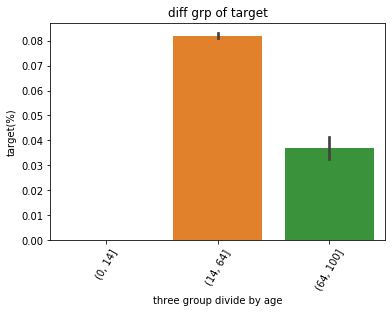

In [43]:
import seaborn as sns
x=app_train['BIN_BIRTH']
y=app_train['TARGET']
sns.barplot(x,y)

plt.xticks(rotation=60)
plt.xlabel('three group divide by age')
plt.ylabel('target(%)')
plt.title('diff grp of target')

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

In [4]:
#幼年、中年、老年區隔
bins=[0,14,64,100]
ages['3g_ages']=pd.cut(ages['age'],bins)

In [31]:
##計算青壯年人口之比例
def perc_adole(x):
    y=len(x[(x['age']> 14) &  (x['age']<=64)])  / len(x['age'])
    return y

#計算幼年人口比例
def perc_kid(x):
    y=len(x[x['age']<14])/  len(x['age'])
    return y

#計算老年人口比例------->可以看是否為高齡化社會以及程度
def perc_old(x):
    y=len(x[x['age']>=65]) / len(x['age'])
    return y

In [33]:
print('the percentage of old : %.2f '% perc_old(ages))
print('the percentage of adole: %.2f '% perc_adole(ages))
print('the percentage of kid: %.2f '% perc_kid(ages))

the percentage of old : 0.12 
the percentage of adole: 0.75 
the percentage of kid: 0.12 


In [34]:
ages.describe()

,age
count,16.00000
mean,35.25000
std,25.56169
min,7.00000
25%,20.25000
50%,26.00000
75%,42.00000
max,100.00000
